<a href="https://colab.research.google.com/github/Siddhi-Sovle/Data-Science/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [479]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [480]:
df = pd.read_csv("/content/ecommerce_product_dataset.csv")

In [481]:
df.head()

,ProductID,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded,City
0,1,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,2023-11-10,Albuquerque
1,2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,2023-09-28,Queens
2,3,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,2023-10-20,Austin
3,4,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,2023-12-05,Dallas
4,5,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,2023-08-10,Tucson


In [482]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ProductID      1000 non-null   int64  
 1   ProductName    1000 non-null   object 
 2   Category       1000 non-null   object 
 3   Price          1000 non-null   float64
 4   Rating         1000 non-null   float64
 5   NumReviews     1000 non-null   int64  
 6   StockQuantity  1000 non-null   int64  
 7   Discount       1000 non-null   float64
 8   Sales          1000 non-null   int64  
 9   DateAdded      1000 non-null   object 
 10  City           1000 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 86.1+ KB


In [483]:
for i in df.columns:
  print(" ")
  print(df[i].value_counts())

 
ProductID
1       1
672     1
659     1
660     1
661     1
       ..
339     1
340     1
341     1
342     1
1000    1
Name: count, Length: 1000, dtype: int64
 
ProductName
Biography        22
Mountain Bike    19
Throw Blanket    18
Denim Jacket     17
Vitamin D        15
                 ..
Rain Jacket       5
Winter Coat       5
Cuticle Oil       5
Fantasy Book      4
Pillar Candle     4
Name: count, Length: 100, dtype: int64
 
Category
Electronics                   40
Wine                          40
Mobile phone accessories      40
Motor vehicle parts           40
Underwear                     40
Nail care                     40
Cookware                      40
Bath and body                 40
Candles                       40
Posters and artwork           40
Bedsheets                     40
Socks                         40
Perfume and cologne           40
Clothing                      40
Drinkware                     40
Art and crafting materials    40
Bicycles                  

In [484]:
df = df.drop(['ProductID','DateAdded'], axis=1)

In [485]:
df.head()

,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,City
0,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,Albuquerque
1,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,Queens
2,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,Austin
3,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,Dallas
4,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,Tucson


In [486]:
df.duplicated().sum()

0

#**UNIVARIATE ANALYSIS**

In [487]:
df.describe()

,Price,Rating,NumReviews,StockQuantity,Discount,Sales
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,253.77551,3.025600,2498.753000,495.395000,0.251640,1011.037000
std,141.40362,1.151004,1463.241871,292.799253,0.146455,582.113466
min,10.11000,1.000000,3.000000,0.000000,0.000000,0.000000
25%,133.09250,2.100000,1201.750000,241.750000,0.130000,502.000000
50%,251.31000,3.100000,2476.000000,505.000000,0.250000,998.000000
75%,375.82750,4.000000,3797.500000,743.500000,0.380000,1540.000000
max,499.74000,5.000000,4994.000000,993.000000,0.500000,1997.000000


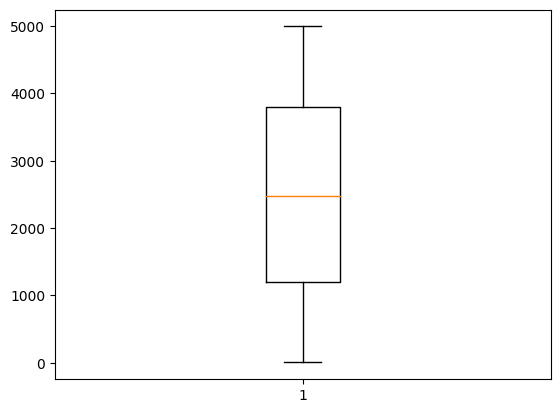

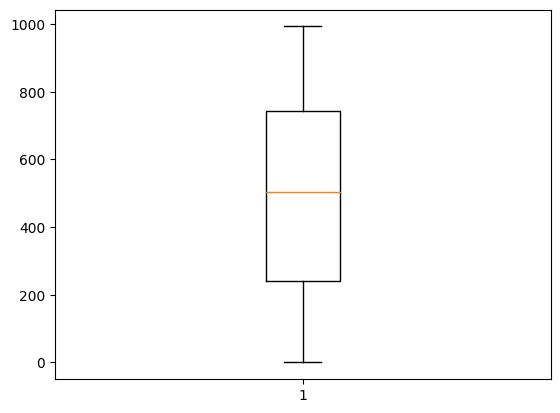

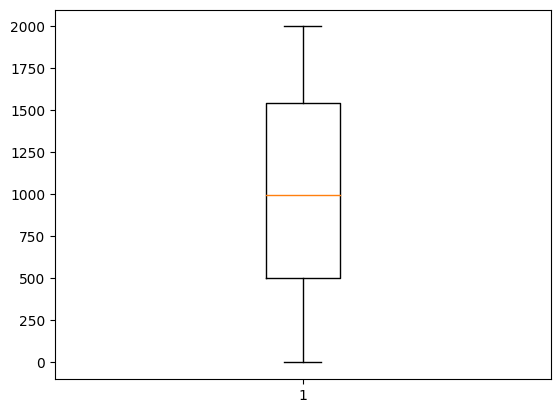

In [488]:
for i in df.columns:
  if df[i].dtype == 'int':
    plt.boxplot(df[i])
    plt.show()

In [489]:
df.columns

Index(['ProductName', 'Category', 'Price', 'Rating', 'NumReviews',
       'StockQuantity', 'Discount', 'Sales', 'City'],
      dtype='object')

<ipython-input-490-38150e746f05>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_10_products.index, x=top_10_products.values, palette="viridis")


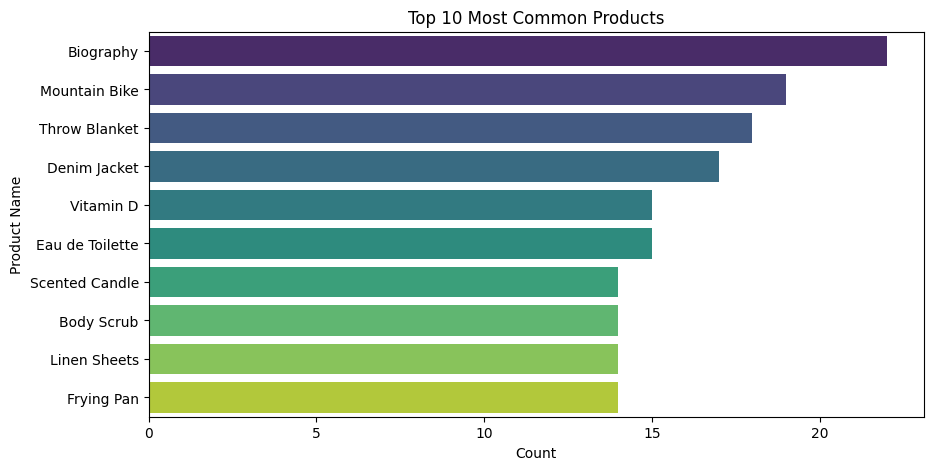

Top 10 Most Common Products:
ProductName
Biography          22
Mountain Bike      19
Throw Blanket      18
Denim Jacket       17
Vitamin D          15
Eau de Toilette    15
Scented Candle     14
Body Scrub         14
Linen Sheets       14
Frying Pan         14
Name: count, dtype: int64


In [490]:
top_10_products = df['ProductName'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(y=top_10_products.index, x=top_10_products.values, palette="viridis")
plt.title('Top 10 Most Common Products')
plt.xlabel('Count')
plt.ylabel('Product Name')
plt.show()

# Print the top 10 most common products
print("Top 10 Most Common Products:")
print(top_10_products)

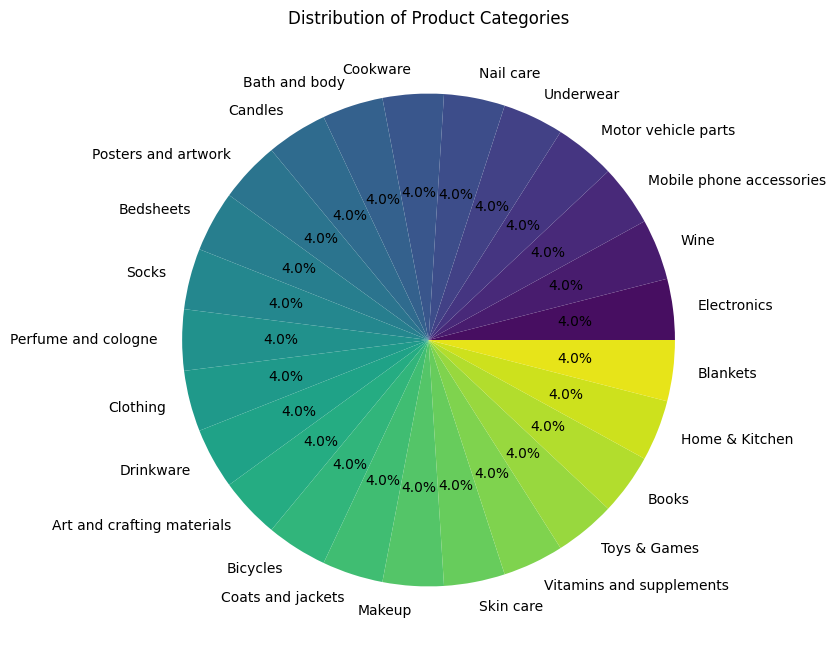

In [491]:


# Pie chart: Display the distribution of product categories
plt.figure(figsize=(8, 8))
category_counts = df['Category'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=sns.color_palette("viridis", len(category_counts)))
plt.title('Distribution of Product Categories')
plt.show()

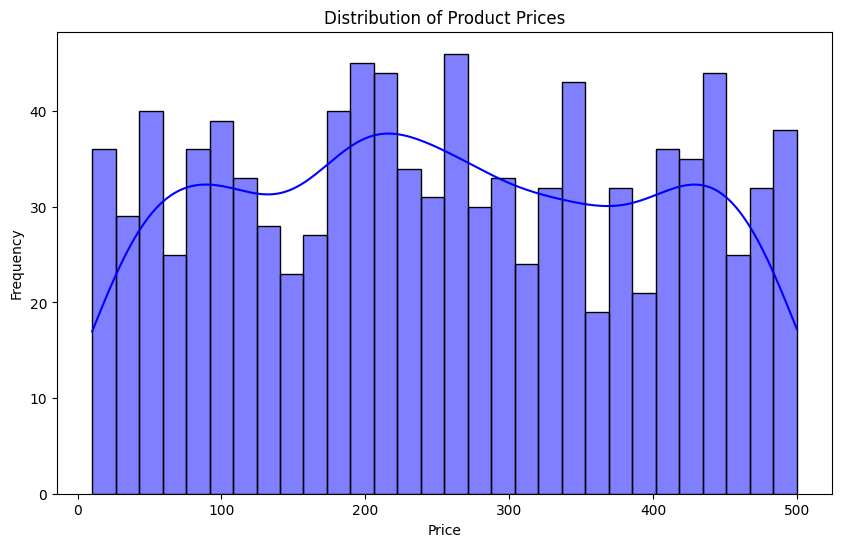

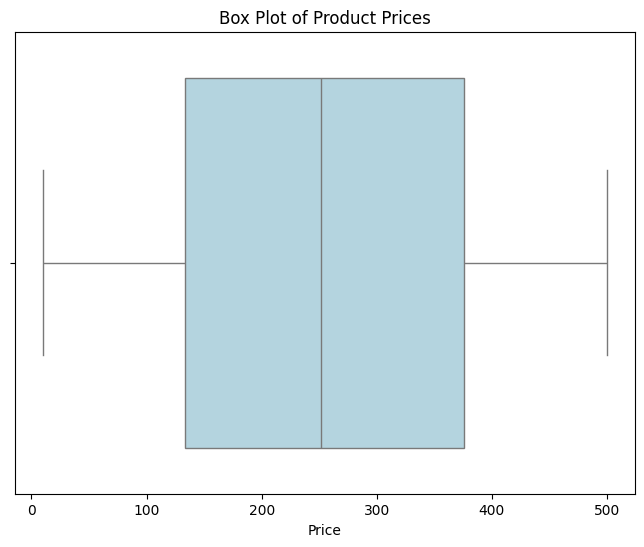

In [492]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True, color='blue')
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Box plot: Detect outliers and understand the spread of prices
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Price'], color='lightblue')
plt.title('Box Plot of Product Prices')
plt.xlabel('Price')
plt.show()

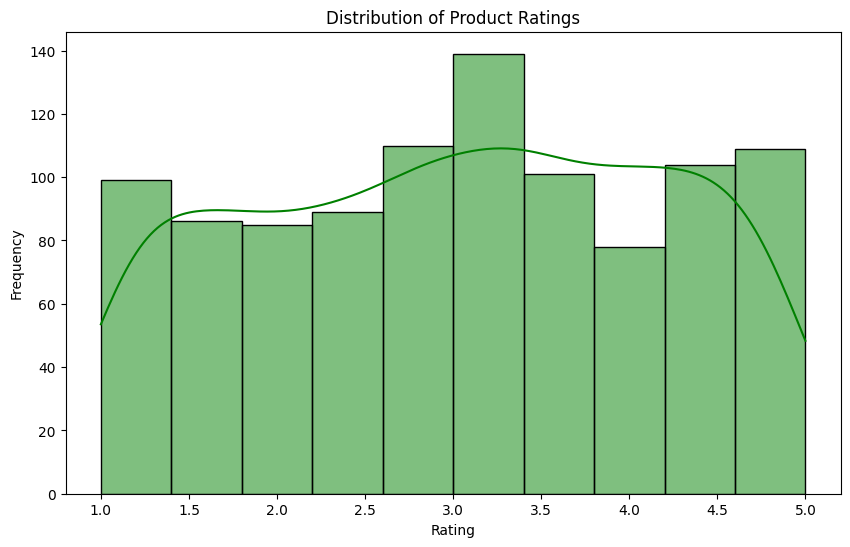

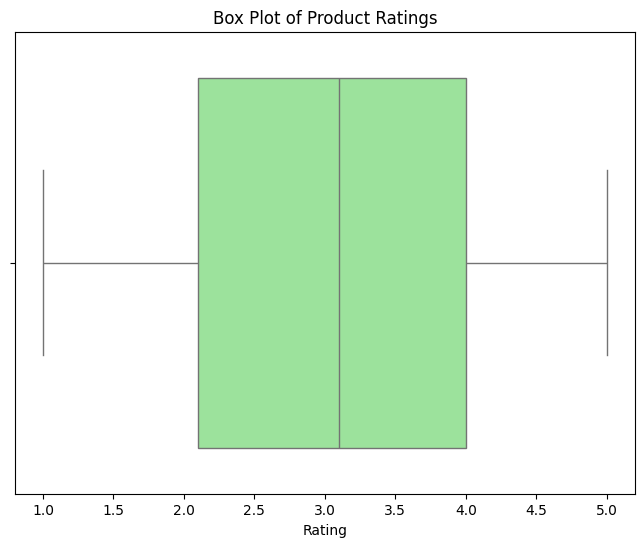

In [493]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=10, kde=True, color='green')
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Box plot: Analyze the distribution and detect any skewness or outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Rating'], color='lightgreen')
plt.title('Box Plot of Product Ratings')
plt.xlabel('Rating')
plt.show()

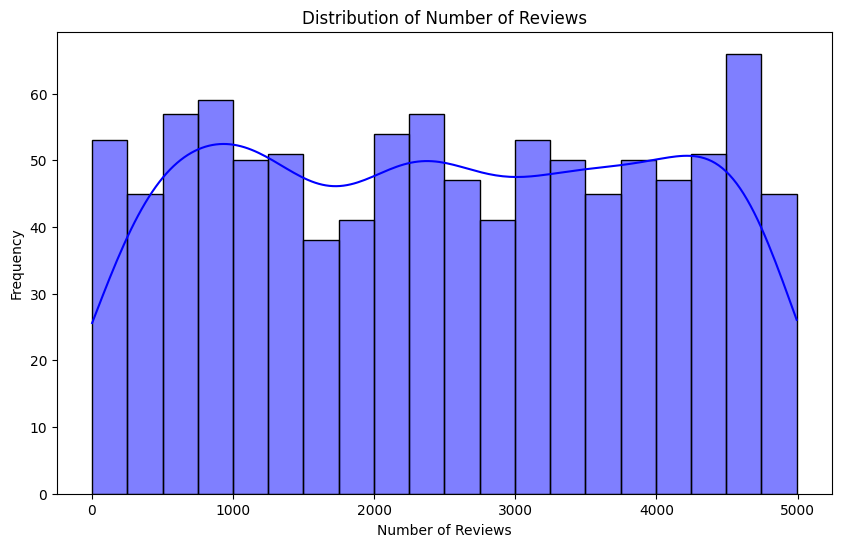

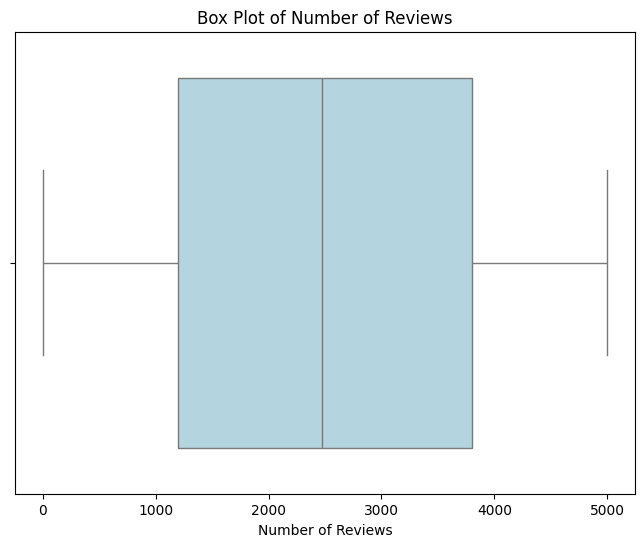

In [494]:
plt.figure(figsize=(10, 6))
sns.histplot(df['NumReviews'], bins=20, kde=True, color='blue')
plt.title('Distribution of Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.show()

# Box plot: Analyze outliers and the range of review counts
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['NumReviews'], color='lightblue')
plt.title('Box Plot of Number of Reviews')
plt.xlabel('Number of Reviews')
plt.show()

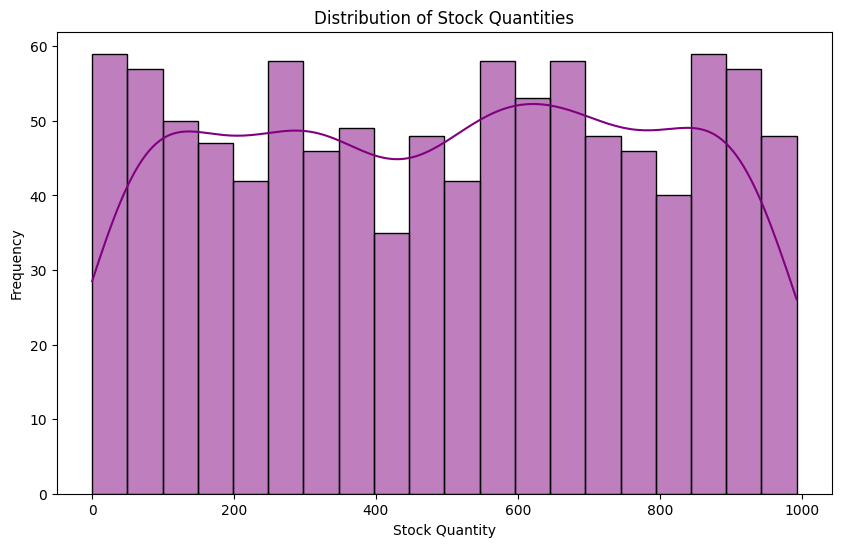

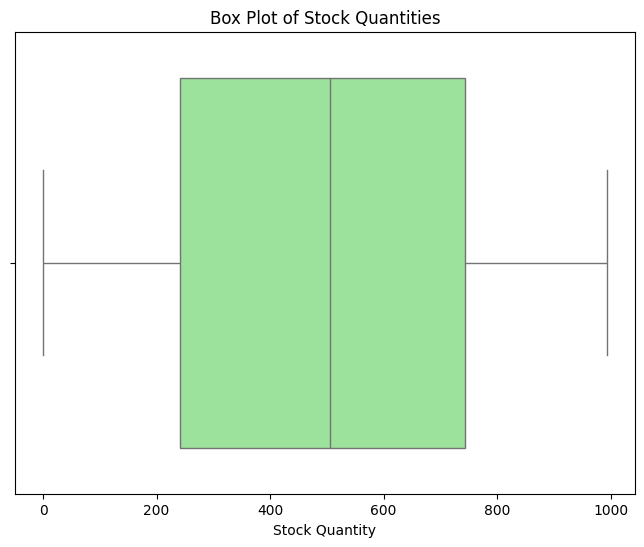

In [495]:
plt.figure(figsize=(10, 6))
sns.histplot(df['StockQuantity'], bins=20, kde=True, color='purple')
plt.title('Distribution of Stock Quantities')
plt.xlabel('Stock Quantity')
plt.ylabel('Frequency')
plt.show()

# Box plot: Detect outliers and understand the spread of stock quantities
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['StockQuantity'], color='lightgreen')
plt.title('Box Plot of Stock Quantities')
plt.xlabel('Stock Quantity')
plt.show()

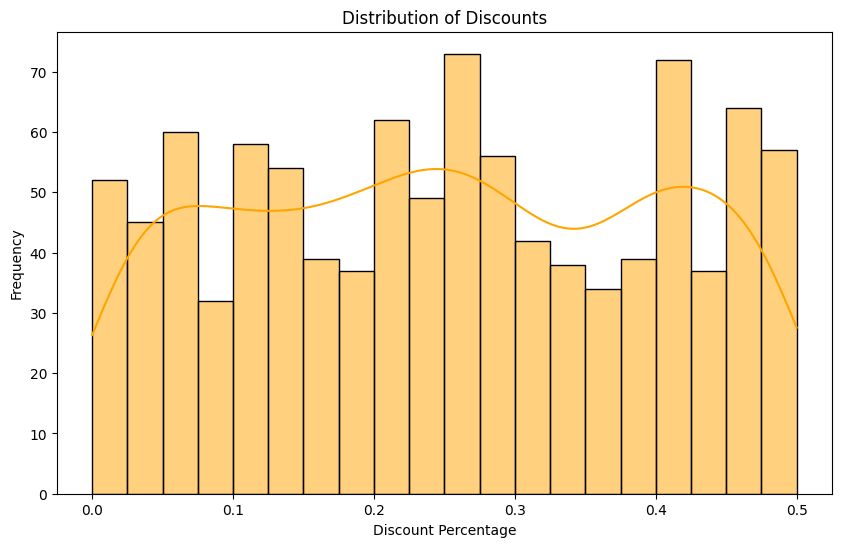

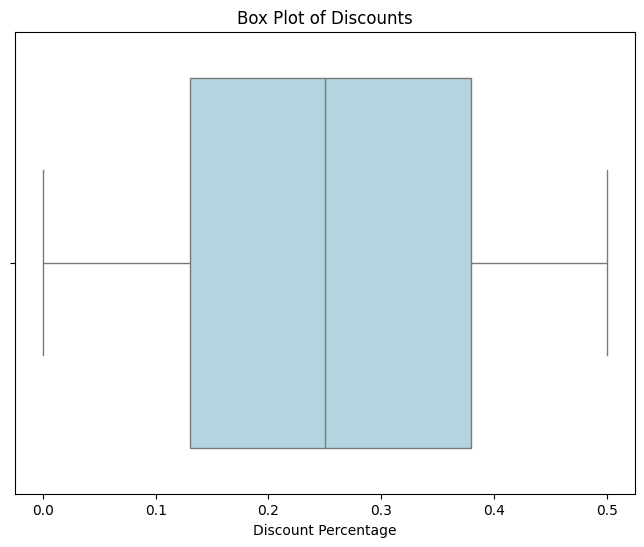

In [496]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Discount'], bins=20, kde=True, color='orange')
plt.title('Distribution of Discounts')
plt.xlabel('Discount Percentage')
plt.ylabel('Frequency')
plt.show()

# Box plot: Analyze the spread and identify extreme discounts
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Discount'], color='lightblue')
plt.title('Box Plot of Discounts')
plt.xlabel('Discount Percentage')
plt.show()

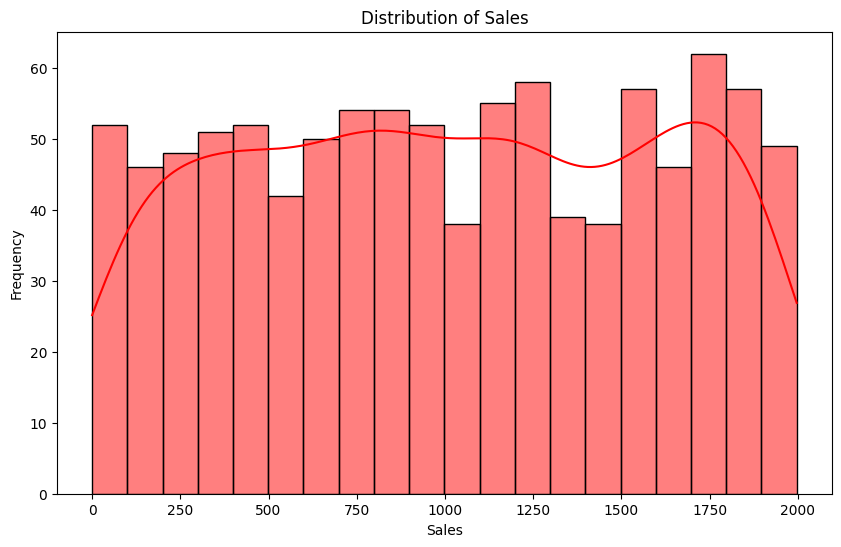

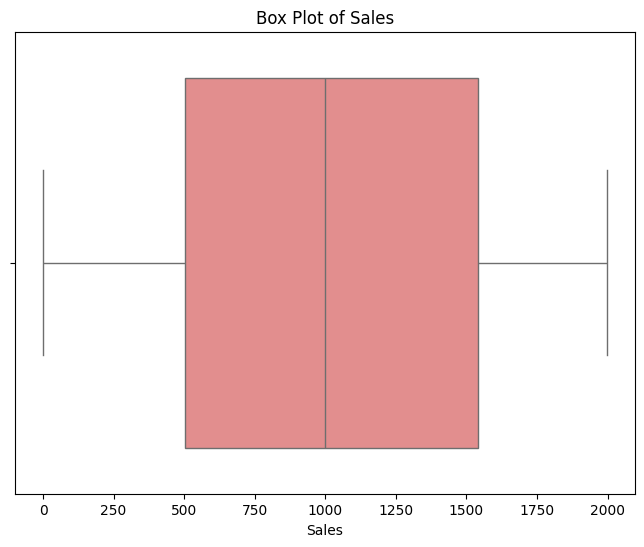

In [497]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], bins=20, kde=True, color='red')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

# Box plot: Detect outliers and understand the sales spread
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Sales'], color='lightcoral')
plt.title('Box Plot of Sales')
plt.xlabel('Sales')
plt.show()

In [498]:
df.describe()

,Price,Rating,NumReviews,StockQuantity,Discount,Sales
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,253.77551,3.025600,2498.753000,495.395000,0.251640,1011.037000
std,141.40362,1.151004,1463.241871,292.799253,0.146455,582.113466
min,10.11000,1.000000,3.000000,0.000000,0.000000,0.000000
25%,133.09250,2.100000,1201.750000,241.750000,0.130000,502.000000
50%,251.31000,3.100000,2476.000000,505.000000,0.250000,998.000000
75%,375.82750,4.000000,3797.500000,743.500000,0.380000,1540.000000
max,499.74000,5.000000,4994.000000,993.000000,0.500000,1997.000000


<ipython-input-499-b63082c84774>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='City', data=df[df['City'].isin(top_cities.index)], order=top_cities.index, palette='viridis')


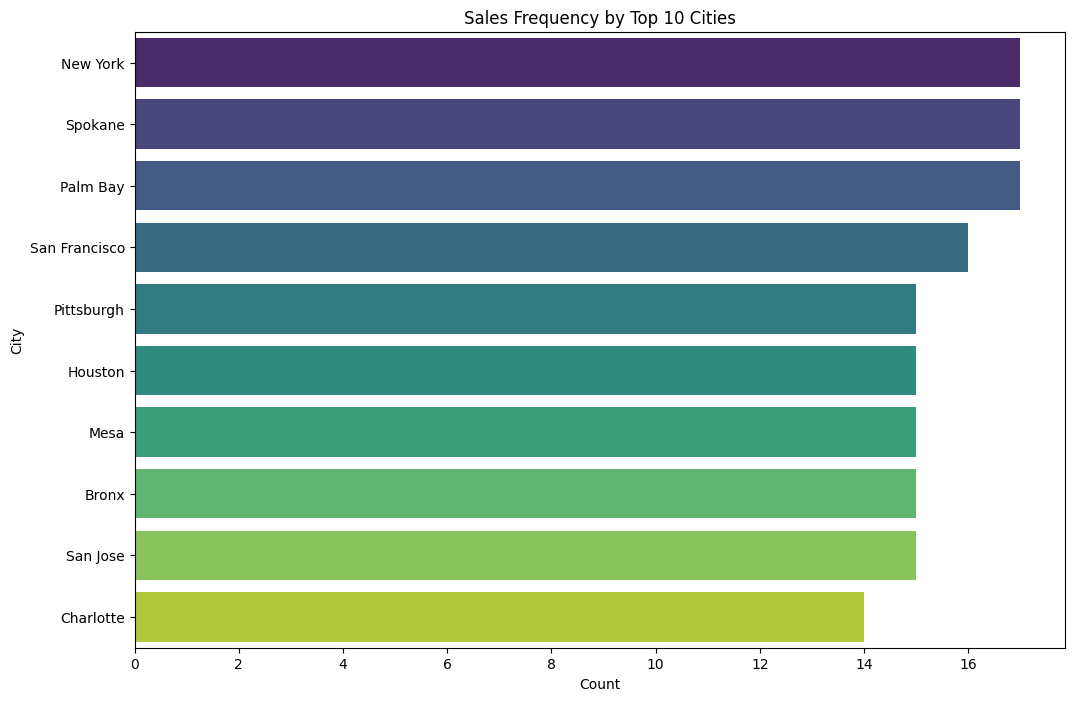

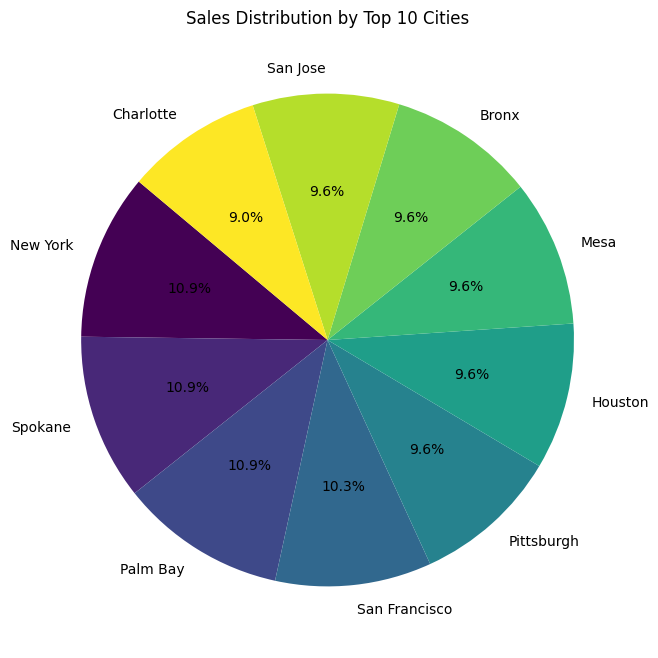

In [499]:
top_cities = df['City'].value_counts().head(10)

# Count plot: Display the frequency of sales by the top 10 cities
plt.figure(figsize=(12, 8))
sns.countplot(y='City', data=df[df['City'].isin(top_cities.index)], order=top_cities.index, palette='viridis')
plt.title('Sales Frequency by Top 10 Cities')
plt.xlabel('Count')
plt.ylabel('City')
plt.show()

# Pie chart: Show the distribution of sales across the top 10 cities
plt.figure(figsize=(8, 8))
top_cities.plot.pie(autopct='%1.1f%%', startangle=140, cmap='viridis')
plt.title('Sales Distribution by Top 10 Cities')
plt.ylabel('')  # Hide the y-label
plt.show()

#**BIVARIATE ANALYSIS**

<ipython-input-500-58829297c4f8>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Sales', data=df_top_categories, palette='viridis', estimator='mean', order=top_categories)


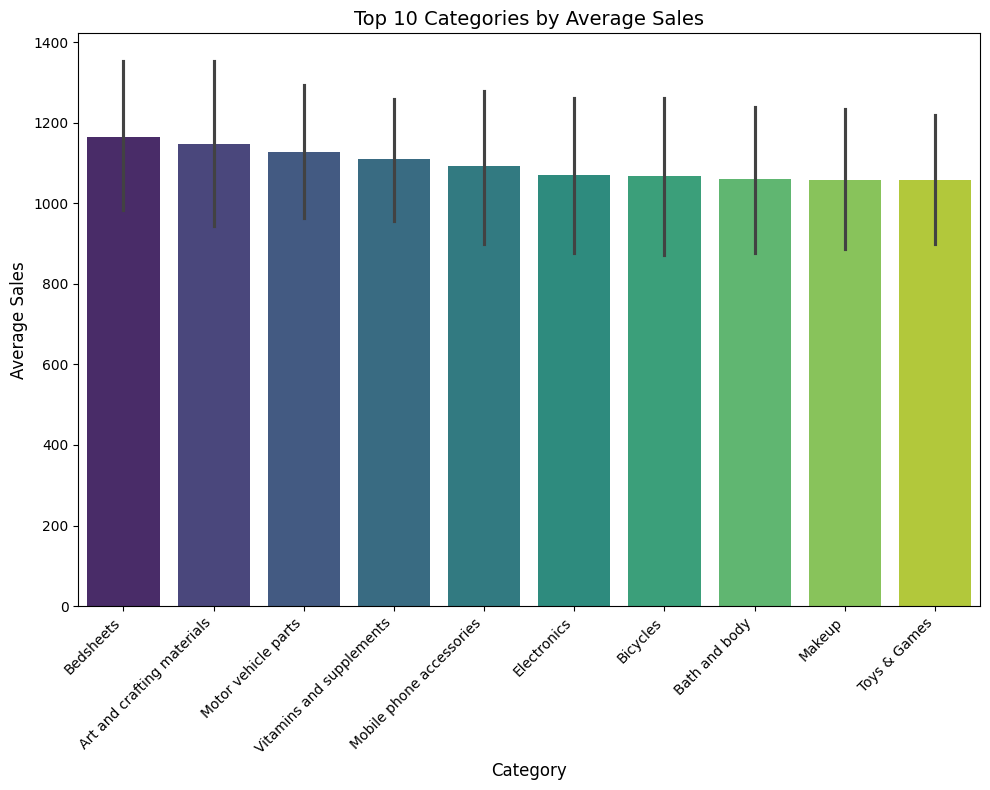

In [500]:
# Calculate the top 10 categories by average sales
top_categories = df.groupby('Category')['Sales'].mean().nlargest(10).index

# Filter the DataFrame to include only the top 10 categories
df_top_categories = df[df['Category'].isin(top_categories)]

# Plot the average sales for the top 10 categories
plt.figure(figsize=(10, 8))
sns.barplot(x='Category', y='Sales', data=df_top_categories, palette='viridis', estimator='mean', order=top_categories)

# Adjust title and labels
plt.title('Top 10 Categories by Average Sales')
plt.xlabel('Category')
plt.ylabel('Average Sales')

# Rotate x-axis labels for better readability and adjust font size
plt.xticks(rotation=45, ha='right', fontsize=10)

# Optionally, reduce font size for other labels if necessary
plt.title('Top 10 Categories by Average Sales', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)

plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

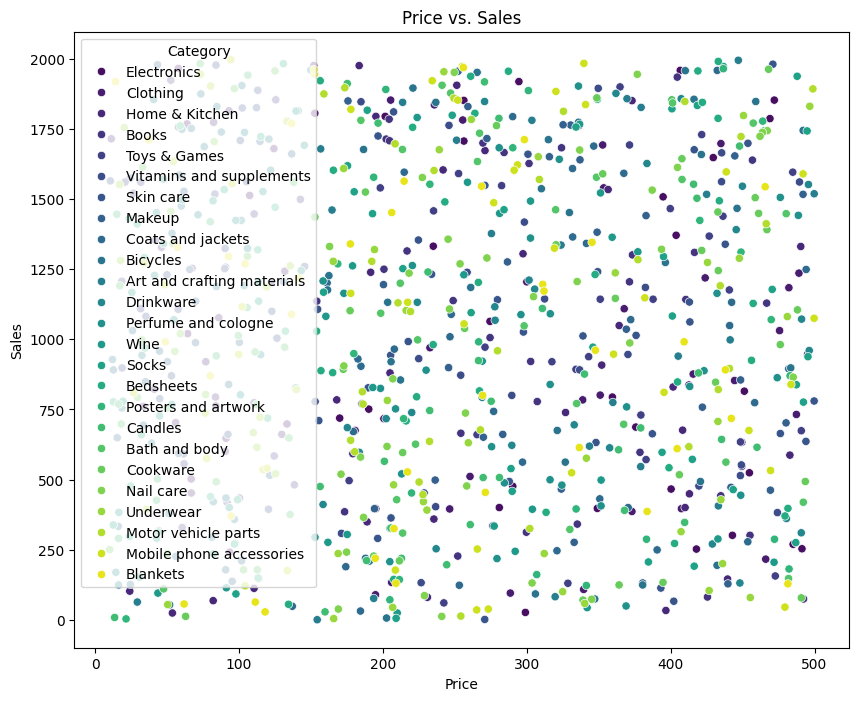

In [501]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Price', y='Sales', data=df, hue='Category', palette='viridis')
plt.title('Price vs. Sales')
plt.xlabel('Price')
plt.ylabel('Sales')
plt.show()

In [502]:
price_sales_corr = df['Price'].corr(df['Sales'])
print(f'Correlation between Price and Sales: {price_sales_corr}')

Correlation between Price and Sales: 0.02907605622452875


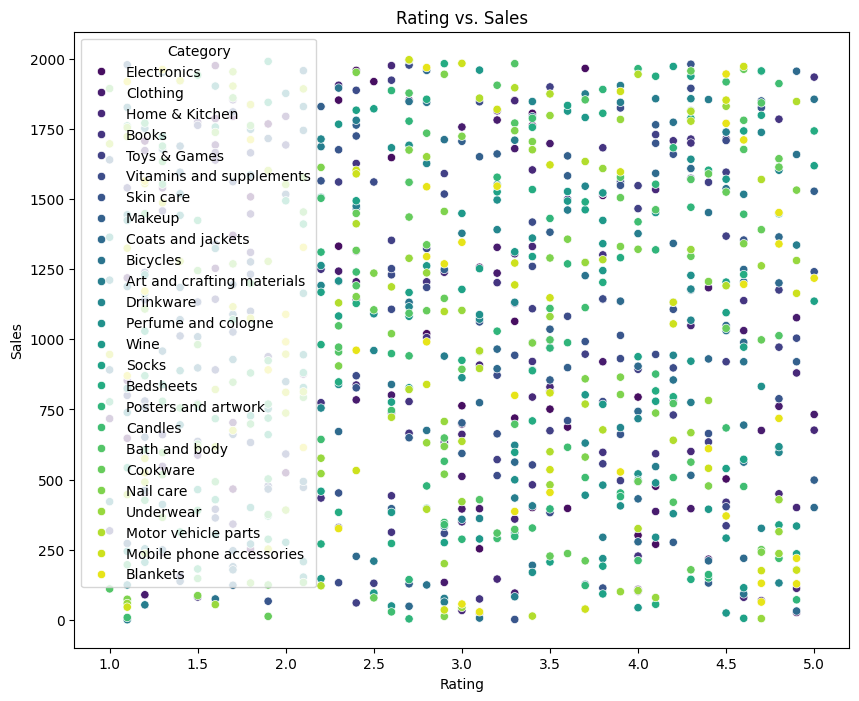

In [503]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Rating', y='Sales', data=df, hue='Category', palette='viridis')
plt.title('Rating vs. Sales')
plt.xlabel('Rating')
plt.ylabel('Sales')
plt.show()

In [504]:
rating_sales_corr = df['Rating'].corr(df['Sales'])
print(f'Correlation between Rating and Sales: {rating_sales_corr}')

Correlation between Rating and Sales: 0.008475382887570318


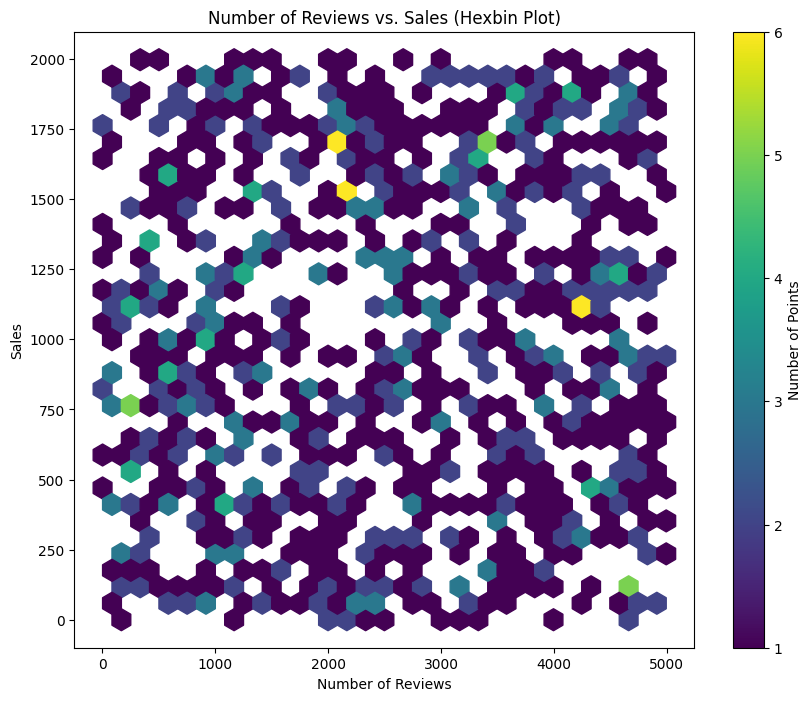

In [505]:
plt.figure(figsize=(10, 8))
plt.hexbin(df['NumReviews'], df['Sales'], gridsize=30, cmap='viridis', mincnt=1)
plt.colorbar(label='Number of Points')
plt.title('Number of Reviews vs. Sales (Hexbin Plot)')
plt.xlabel('Number of Reviews')
plt.ylabel('Sales')
plt.show()

<ipython-input-506-5029306a27e3>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='NumReviews', y='Sales', data=df_top_num_reviews, palette='viridis')


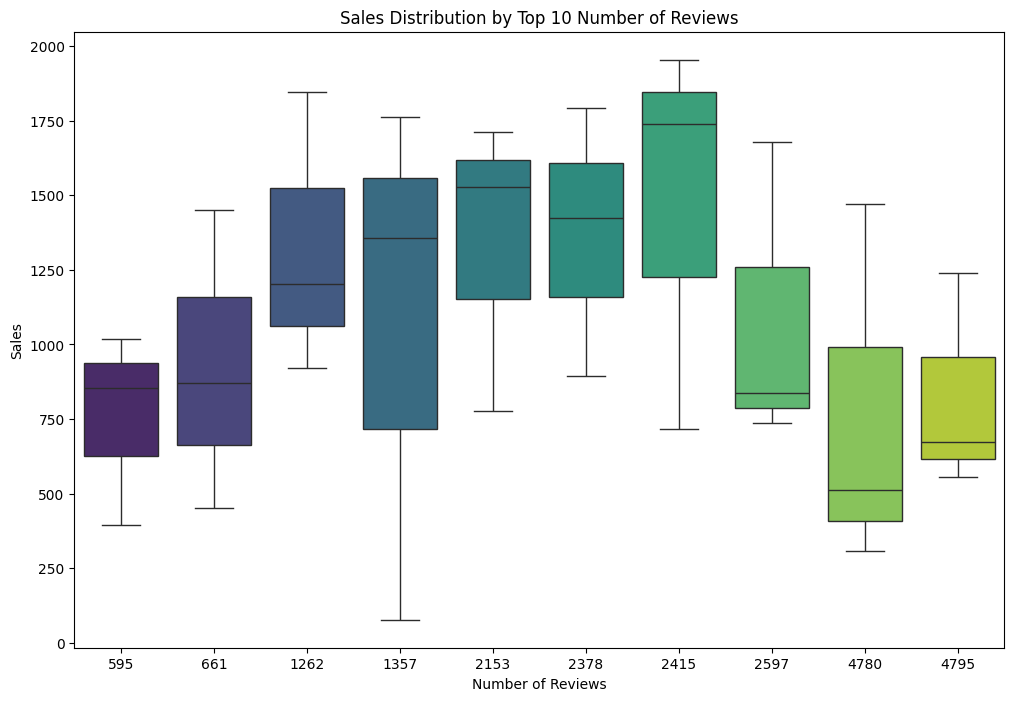

In [506]:
top_num_reviews = df['NumReviews'].value_counts().nlargest(10).index

# Filter the DataFrame to include only these top 10 NumReviews
df_top_num_reviews = df[df['NumReviews'].isin(top_num_reviews)]

# Plot the box plot for the top 10 NumReviews
plt.figure(figsize=(12, 8))
sns.boxplot(x='NumReviews', y='Sales', data=df_top_num_reviews, palette='viridis')
plt.title('Sales Distribution by Top 10 Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Sales')
plt.show()

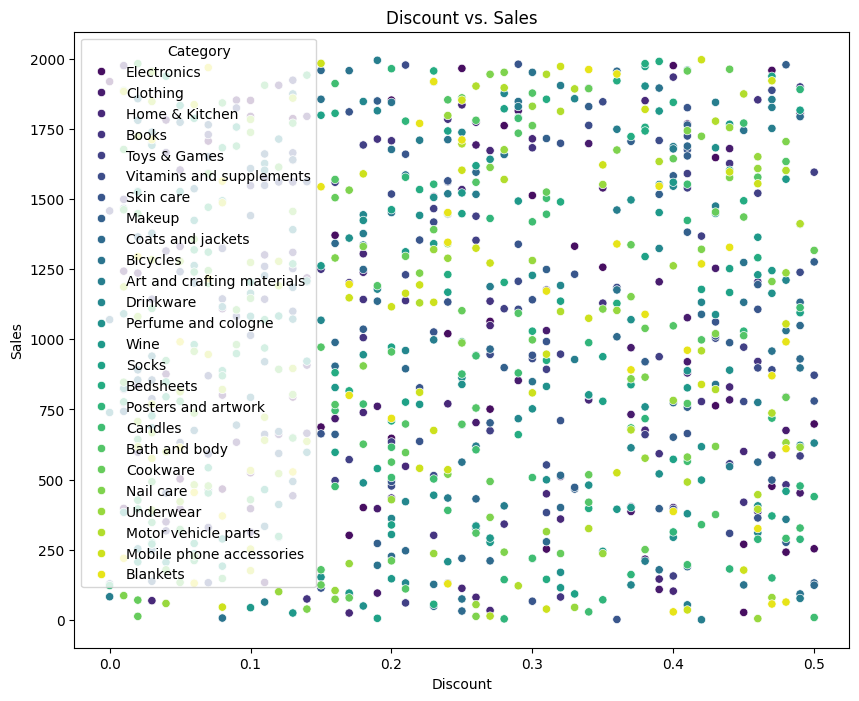

In [507]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Discount', y='Sales', data=df, hue='Category', palette='viridis')
plt.title('Discount vs. Sales')
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.show()

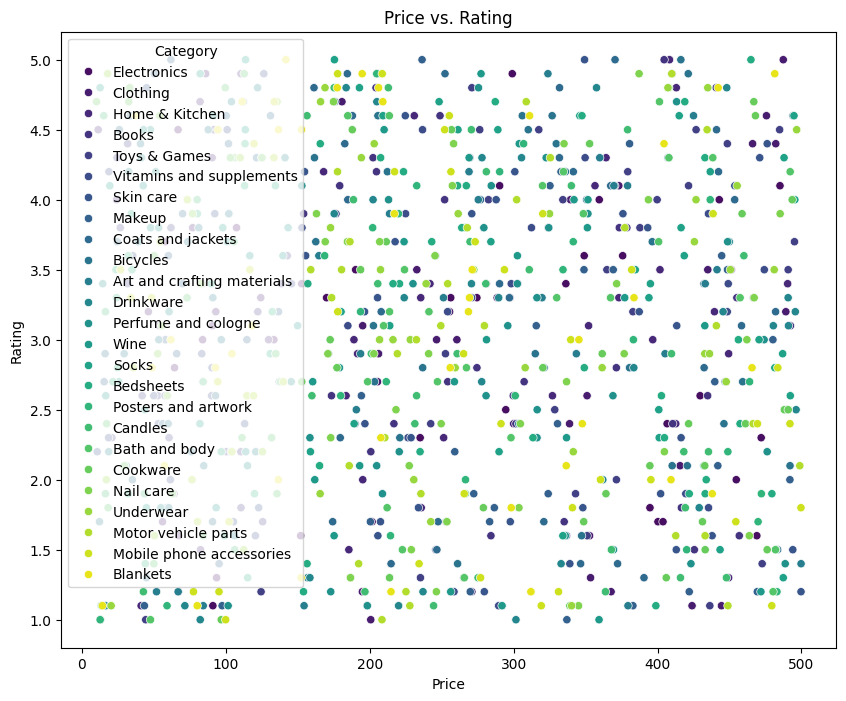

In [508]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Price', y='Rating', data=df, hue='Category', palette='viridis')
plt.title('Price vs. Rating')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

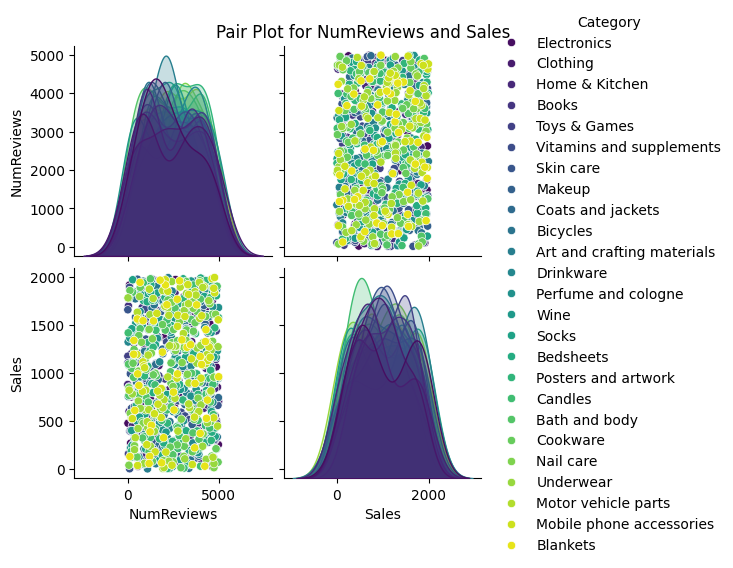

In [509]:
sns.pairplot(df[['NumReviews', 'Sales', 'Category']], hue='Category', palette='viridis')
plt.suptitle('Pair Plot for NumReviews and Sales', y=1.02)
plt.show()

In [510]:
df.head()

,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,City
0,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,Albuquerque
1,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,Queens
2,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,Austin
3,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,Dallas
4,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,Tucson


In [511]:
# df = df.drop('ProductName', axis=1)

In [512]:
category_buckets = {
    'Electronics & Accessories': ['Electronics', 'Mobile phone accessories'],
    'Apparel & Personal Care': ['Clothing', 'Coats and jackets', 'Socks', 'Underwear', 'Skin care', 'Makeup', 'Perfume and cologne', 'Bath and body', 'Nail care'],
    'Home & Kitchen': ['Home & Kitchen', 'Cookware', 'Drinkware', 'Bedsheets', 'Blankets'],
    'Books & Media': ['Books', 'Posters and artwork', 'Art and crafting materials', 'Wine', 'Candles'],
    'Toys & Miscellaneous': ['Toys & Games', 'Vitamins and supplements', 'Motor vehicle parts', 'Bicycles']
}

# Create a reverse mapping for easy lookup
category_mapping = {item: bucket for bucket, items in category_buckets.items() for item in items}

# Map the categories in the dataframe
df['Category_Bucket'] = df['Category'].map(category_mapping)


In [513]:
df = df.drop('Category', axis=1)

In [514]:
simplified_buckets = {
    'Apparel': ['Jacket', 'Sweater', 'Denim Jacket', 'Rain Jacket', 'Leather Jacket', 'Winter Coat', 'Jeans', 'T-Shirt', 'Knee-High Socks', 'Ankle Socks', 'Wool Socks', 'Cotton Socks', 'Thongs', 'Boxers', 'Briefs', 'Panties'],
    'Skincare': ['Sunscreen', 'Cleanser', 'Moisturizer', 'Toner', 'Body Lotion', 'Body Scrub', 'Bath Salts', 'Shower Gel', 'Mascara', 'Blush', 'Lipstick', 'Foundation'],
    'Fragrance & Nail Care': ['Eau de Toilette', 'Body Spray', 'Perfume Oil', 'Eau de Parfum', 'Nail File', 'Nail Clippers', 'Nail Polish', 'Cuticle Oil'],
    'Kitchen': ['Coffee Maker', 'Microwave', 'Blender', 'Toaster', 'Coffee Mug', 'Water Bottle', 'Tea Cup', 'Wine Glass', 'Dutch Oven', 'Frying Pan', 'Grill Pan', 'Saucepan'],
    'Bedding': ['Silk Sheets', 'Linen Sheets', 'Bamboo Sheets', 'Cotton Sheets', 'Throw Blanket', 'Electric Blanket', 'Fleece Blanket', 'Weighted Blanket'],
    'Books&Art':['Biography', 'Fantasy Book', 'Science Book', 'Novel','Sketchbook', 'Brushes', 'Paint Set', 'Canvas','Framed Poster', 'Canvas Print', 'Art Print', 'Digital Art'],
    'Wine and Candles' :  ['White Wine', 'Rose Wine', 'Red Wine', 'Sparkling Wine', 'Soy Candle', 'Beeswax Candle', 'Scented Candle', 'Pillar Candle'],
    'Toys' : ['Board Game', 'Puzzle', 'Action Figure', 'Toy Car'],
    'Miscellaneous' : ['Fish Oil', 'Protein Powder', 'Vitamin D', 'Multivitamin', 'Road Bike', 'Mountain Bike', 'Hybrid Bike', 'Electric Bike', 'Oil Filter','Brake Pads','Spark Plugs','Car Battery'],
    'Electronics' :  ['Headphones', 'Smartwatch', 'Smartphone', 'Laptop', 'Charger','Screen Protector', 'Earbuds', 'Phone Case']
}

# Create a reverse mapping for easy lookup
category_mapping = {item: bucket for bucket, items in simplified_buckets.items() for item in items}

# Map the categories in the dataframe
df['Product_Name'] = df['ProductName'].map(category_mapping)


In [515]:
df = df.drop('ProductName', axis=1)

In [516]:
df.head()

,Price,Rating,NumReviews,StockQuantity,Discount,Sales,City,Category_Bucket,Product_Name
0,400.31,1.7,3772,20,0.08,466,Albuquerque,Electronics & Accessories,Electronics
1,235.03,2.3,2919,663,0.33,1332,Queens,Electronics & Accessories,Electronics
2,417.90,1.8,1184,459,0.31,252,Austin,Electronics & Accessories,Electronics
3,152.70,3.4,2047,475,0.49,1806,Dallas,Electronics & Accessories,Electronics
4,394.74,1.8,1267,831,0.23,1508,Tucson,Electronics & Accessories,Electronics


In [517]:
df['City'].unique()

array(['Albuquerque', 'Queens', 'Austin', 'Dallas', 'Tucson',
       'Louisville', 'Cleveland', 'Houston', 'Cape Coral', 'Minneapolis',
       'Memphis', 'Mesa', 'Palm Bay', 'Columbia', 'Seattle', 'Hartford',
       'Charlotte', 'Akron', 'San Francisco', 'Cincinnati', 'Spokane',
       'New York', 'Indianapolis', 'Virginia Beach', 'Baltimore',
       'Providence', 'Buffalo', 'San Antonio', 'Bronx', 'Tulsa', 'Toledo',
       'Harrisburg', 'Portland', 'Ogden', 'San Juan', 'Grand Rapids',
       'Wichita', 'Las Vegas', 'St. Louis', 'Albany', 'Knoxville',
       'San Diego', 'San Jose', 'Boise', 'Kansas City', 'Los Angeles',
       'Staten Island', 'Chicago', 'Atlanta', 'Omaha', 'Salt Lake City',
       'New Orleans', 'Denver', 'Pittsburgh', 'Des Moines', 'Madison',
       'Fort Worth', 'El Paso', 'Concord', 'Washington', 'Boston',
       'Detroit', 'Oklahoma City', 'Allentown', 'Phoenix', 'Orlando',
       'Sacramento', 'Port St. Lucie', 'Manhattan', 'Fresno', 'Denton',
       'Little Roc

In [518]:
simplified_buckets_cities = {
    'Northeast': ['New York', 'Boston', 'Philadelphia', 'Providence', 'Hartford', 'Bridgeport', 'Worcester', 'Baltimore', 'Buffalo', 'Albany', 'Rochester', 'Manhattan', 'New Haven', 'Allentown', 'Wilmington','Queens', 'Bronx', 'Brooklyn', 'Staten Island'],
    'West': ['Los Angeles', 'San Francisco', 'San Diego', 'Seattle', 'Portland', 'Sacramento', 'Las Vegas', 'Phoenix', 'Salt Lake City', 'Boise', 'Denver', 'Reno', 'Bakersfield', 'Fresno', 'Colorado Springs','San Jose', 'Oakland', 'Long Beach', 'Riverside', 'San Juan', 'Spokane','Memphis', 'Virginia Beach', 'Tulsa', 'Harrisburg', 'Charleston', 'New Orleans', 'Denton', 'Columbus', 'Wichita', 'Knoxville'],
    'South': ['Houston', 'Dallas', 'Atlanta', 'Miami', 'Tampa', 'Charlotte', 'Nashville', 'Orlando', 'Jacksonville', 'Raleigh', 'Birmingham', 'Little Rock', 'Baton Rouge', 'Richmond', 'Columbia', 'Cape Coral'],
    'Midwest': ['Chicago', 'Detroit', 'Indianapolis', 'Cleveland', 'Minneapolis', 'St. Louis', 'Kansas City', 'Omaha', 'Cincinnati', 'Dayton', 'Milwaukee', 'Des Moines', 'Akron', 'Grand Rapids', 'Toledo', 'Louisville','Madison', 'Springfield', 'Pittsburgh', 'Oklahoma City'],
    'Southwest': ['Albuquerque', 'Austin', 'Tucson', 'El Paso', 'Fort Worth', 'San Antonio', 'Mesa', 'Palm Bay', 'McAllen', 'Provo', 'Ogden', 'Port St. Lucie', 'Mission Viejo', 'Bonita Springs', 'Richmond','Concord', 'Washington']
}

# Flatten the dictionary for easy lookup
simplified_mapping_cities = {city: region for region, cities in simplified_buckets_cities.items() for city in cities}

# Example: Adding these mappings to your DataFrame
df['Region'] = df['City'].map(simplified_mapping_cities)

In [519]:
df=df.drop('City',axis=1)

In [520]:
df.head()

,Price,Rating,NumReviews,StockQuantity,Discount,Sales,Category_Bucket,Product_Name,Region
0,400.31,1.7,3772,20,0.08,466,Electronics & Accessories,Electronics,Southwest
1,235.03,2.3,2919,663,0.33,1332,Electronics & Accessories,Electronics,Northeast
2,417.90,1.8,1184,459,0.31,252,Electronics & Accessories,Electronics,Southwest
3,152.70,3.4,2047,475,0.49,1806,Electronics & Accessories,Electronics,South
4,394.74,1.8,1267,831,0.23,1508,Electronics & Accessories,Electronics,Southwest


In [521]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Category_Bucket'] = label_encoder.fit_transform(df['Category_Bucket'])
df['Product_Name'] = label_encoder.fit_transform(df['Product_Name'])
df['Region'] = label_encoder.fit_transform(df['Region'])

In [522]:
df.head()

,Price,Rating,NumReviews,StockQuantity,Discount,Sales,Category_Bucket,Product_Name,Region
0,400.31,1.7,3772,20,0.08,466,2,3,3
1,235.03,2.3,2919,663,0.33,1332,2,3,1
2,417.90,1.8,1184,459,0.31,252,2,3,3
3,152.70,3.4,2047,475,0.49,1806,2,3,2
4,394.74,1.8,1267,831,0.23,1508,2,3,3


In [523]:
df.columns

Index(['Price', 'Rating', 'NumReviews', 'StockQuantity', 'Discount', 'Sales',
       'Category_Bucket', 'Product_Name', 'Region'],
      dtype='object')

In [524]:
df.head()

,Price,Rating,NumReviews,StockQuantity,Discount,Sales,Category_Bucket,Product_Name,Region
0,400.31,1.7,3772,20,0.08,466,2,3,3
1,235.03,2.3,2919,663,0.33,1332,2,3,1
2,417.90,1.8,1184,459,0.31,252,2,3,3
3,152.70,3.4,2047,475,0.49,1806,2,3,2
4,394.74,1.8,1267,831,0.23,1508,2,3,3


In [525]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
gone = pd.DataFrame()
gone['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
gone['Columns'] = df.columns

In [526]:
gone

,VIF,Columns
0,3.720178,Price
1,5.864768,Rating
2,3.541099,NumReviews
3,3.432697,StockQuantity
4,3.571871,Discount
5,3.724836,Sales
6,2.236689,Category_Bucket
7,3.019308,Product_Name
8,2.838281,Region


In [527]:
# df['Price_Discount'] = df['Price'] * df['Discount']

In [528]:
# df['Reviews_Rating'] = df['NumReviews'] * df['Rating']

In [529]:
# df.describe()

In [530]:
import numpy as np
df['Log_Sales'] = np.log1p(df['Sales'])
df['Log_Sales_Discount'] = df['Log_Sales'] * df['Discount']
df['Log_Sales_Price'] = df['Log_Sales'] * df['Price']

In [531]:
df.columns

Index(['Price', 'Rating', 'NumReviews', 'StockQuantity', 'Discount', 'Sales',
       'Category_Bucket', 'Product_Name', 'Region', 'Log_Sales',
       'Log_Sales_Discount', 'Log_Sales_Price'],
      dtype='object')

In [550]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df.drop(['Log_Sales'] ,axis=1)
Y = df['Log_Sales']

In [551]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [552]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [553]:
model.score(X_train, Y_train)

0.9103491748974814

In [554]:
model.score(X_test, Y_test)

0.8789273748113606

In [556]:
y_pred_train = model.predict(X_train)
ss_total = ((Y_train - Y_train.mean())**2).sum()
ss_reg = ((y_pred_train - Y_train.mean())**2).sum()
r_squared = ss_reg / ss_total

# Get the number of observations and the number of independent variables
n_obs = len(X)
n_vars = len(X.columns)

# Calculate the adjusted R-squared
adjusted_r_squared = 1 - (1 - r_squared) * (n_obs - 1) / (n_obs - n_vars - 1)

# Print the adjusted R-squared
print("Adjusted R-squared:", adjusted_r_squared)

Adjusted R-squared: 0.9093510381807886


In [562]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score



# Create and fit the Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter as needed
ridge_model.fit(X_train, Y_train)

# Make predictions
y_pred = ridge_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Display the model coefficients
print("Model Coefficients:")
print(ridge_model.coef_)

# If you want to see the intercept
print(f"Intercept: {ridge_model.intercept_}")

Mean Squared Error: 0.08790224491805292
R-squared: 0.8790161055520374
Model Coefficients:
[-1.04301351e-02  8.33066927e-03 -1.25206172e-05 -6.58761143e-05
 -4.21399259e+00  6.70513685e-04 -2.37451741e-04  2.83373739e-03
 -1.11286047e-02  6.66693191e-01  1.59470269e-03]
Intercept: 5.8847510491863035


In [563]:
ridge_model.score(X_train, Y_train)

0.8825314639939392

In [564]:
ridge_model.score(X_test, Y_test)

0.8790161055520374

In [565]:
y_pred_train = ridge_model.predict(X_train)
ss_total = ((Y_train - Y_train.mean())**2).sum()
ss_reg = ((y_pred_train - Y_train.mean())**2).sum()
r_squared = ss_reg / ss_total

# Get the number of observations and the number of independent variables
n_obs = len(X)
n_vars = len(X.columns)

# Calculate the adjusted R-squared
adjusted_r_squared = 1 - (1 - r_squared) * (n_obs - 1) / (n_obs - n_vars - 1)

# Print the adjusted R-squared
print("Adjusted R-squared:", adjusted_r_squared)

Adjusted R-squared: 0.8394485994960108


In [566]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(criterion='squared_error', min_samples_split=7,min_samples_leaf=1 ,min_impurity_decrease=0.001)
tree.fit(X_train, Y_train)

DecisionTreeRegressor(min_impurity_decrease=0.001, min_samples_split=7)

In [567]:
tree.score(X_train, Y_train)

0.9941970976499056

In [568]:
tree.score(X_test, Y_test)

0.9890412653918604

In [569]:
y_pred_train = tree.predict(X_train)
ss_total = ((Y_train - Y_train.mean())**2).sum()
ss_reg = ((y_pred_train - Y_train.mean())**2).sum()
r_squared = ss_reg / ss_total

# Get the number of observations and the number of independent variables
n_obs = len(X)
n_vars = len(X.columns)

# Calculate the adjusted R-squared
adjusted_r_squared = 1 - (1 - r_squared) * (n_obs - 1) / (n_obs - n_vars - 1)

# Print the adjusted R-squared
print("Adjusted R-squared:", adjusted_r_squared)

Adjusted R-squared: 0.994132490437506


In [548]:
results = pd.DataFrame(dtype='int', columns=[['R-squared_Train_Accuracy','R-squared_Test_Accuracy', 'Adjusted-R squared value']],
                       index=['LinearRegression','Ridge','Decision Tree'])

In [570]:
results["R-squared_Train_Accuracy"] = [0.91,0.88,0.99]
results["R-squared_Test_Accuracy"] = [0.87,0.87,0.98]
results["Adjusted-R squared value"] = [0.90,0.83,0.99]

In [571]:
results

,R-squared_Train_Accuracy,R-squared_Test_Accuracy,Adjusted-R squared value
LinearRegression,0.91,0.87,0.90
Ridge,0.88,0.87,0.83
Decision Tree,0.99,0.98,0.99


#So looking at the dataframe, we can say that, Decision tree is the best suited model for the dataset.